# Customer Segmentation Analysis
Visualize the results of a customer segmentation analysis using K-Means clustering. Use a dataset of customer purchase behavior, and create scatter plots to display clusters. Include:

- Scatter plots of customers segmented into different clusters based on purchase frequency and amount.
-  Distinguish clusters with different colors and markers.
- Annotate centroids of each cluster. 

**Hint:** Use `KMeans` from scikit-learn for clustering, `plt.scatter()` for `scatter plots`, and `plt.annotate()` for centroids.
**Expectation:** A scatter plot showing distinct customer segments, each with unique colors and markers, and annotated

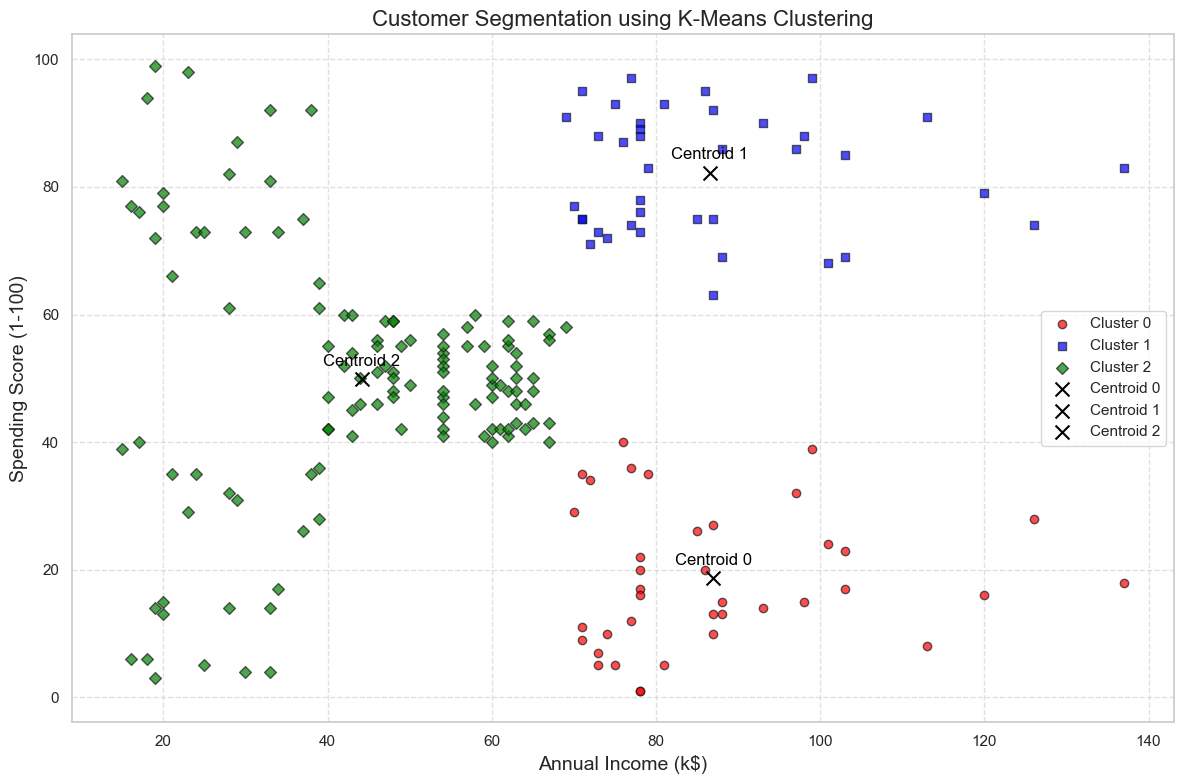

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'C:/Users/USER/Desktop/SoftRaw/Task/Dataset/Mall_Customers.csv'
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError("The file path is incorrect or the file does not exist.")

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot for each cluster
colors = ['red', 'blue', 'green']
markers = ['o', 's', 'D']
for i in range(3):
    cluster_data = data[data['cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                color=colors[i], marker=markers[i], label=f'Cluster {i}', edgecolor='k', alpha=0.7)

# Annotate centroids
centroids = kmeans.cluster_centers_
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color='black', marker='x', s=100, label=f'Centroid {idx}')
    plt.annotate(f'Centroid {idx}', (centroid[0], centroid[1]), 
                 textcoords='offset points', xytext=(0,10), ha='center', fontsize=12, color='black')

# Labels and title
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Customer Segmentation using K-Means Clustering', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()
